# Onboarding Analysis: Tier 1 and Tier 5 Clients

## Data Cleaning and EDA

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [3]:
import pathlib
DATA_DIR = pathlib.Path('data/').absolute()
RESULTS_DIR = pathlib.Path('results/').absolute()
SOURCE_DIR = pathlib.Path('data/00-source').absolute()
CLEANED_DIR = pathlib.Path('data/01-cleaned').absolute()
PROCESSED_DIR = pathlib.Path('data/02-processed').absolute()

assert DATA_DIR.exists(), f'Couldn\t find {DATA_DIR}. Check your path'
assert RESULTS_DIR.exists(), f'Couldn\t find {RESULTS_DIR} folder. Check your path'
assert SOURCE_DIR.exists(), f'Couldn\t find {SOURCE_DIR}. Check your path'
assert CLEANED_DIR.exists(), f'Couldn\t find {CLEANED_DIR} folder. Check your path'
assert PROCESSED_DIR.exists(), f'Couldn\t find {PROCESSED_DIR}. Check your path'

In [4]:
tier1 = pd.read_csv(SOURCE_DIR/'t1_login_by_client.csv')
tier5 = pd.read_csv(SOURCE_DIR/'t5_login_by_client.csv')

In [4]:
tier1.describe()

,Client Name,Month with Year,Count Partners,Count Users,Count Logins,Count TPL Logins
count,435,435,436,436,436,436
unique,35,13,219,252,363,341
top,Rockwell,2023-06,1,1,1,-
freq,13,35,35,21,12,20


In [5]:
tier1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Client Name       435 non-null    object
 1   Month with Year   435 non-null    object
 2   Count Partners    436 non-null    object
 3   Count Users       436 non-null    object
 4   Count Logins      436 non-null    object
 5   Count TPL Logins  436 non-null    object
dtypes: object(6)
memory usage: 20.6+ KB


In [6]:
tier5.describe()

,Client Name,Month with Year,Count Partners,Count Users,Count Logins,Count TPL Logins
count,327,327,328,328,328,328
unique,41,13,72,90,168,138
top,PKware,2023-08,1,1,2,-
freq,13,33,105,49,16,37


In [7]:
tier5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Client Name       327 non-null    object
 1   Month with Year   327 non-null    object
 2   Count Partners    328 non-null    object
 3   Count Users       328 non-null    object
 4   Count Logins      328 non-null    object
 5   Count TPL Logins  328 non-null    object
dtypes: object(6)
memory usage: 15.5+ KB


In [8]:
tier5.head()

,Client Name,Month with Year,Count Partners,Count Users,Count Logins,Count TPL Logins
0,PKware,2023-09,1,1,3,1
1,Megaport,2023-09,51,92,434,303
2,Offensive Security,2023-09,49,69,382,246
3,FIMER,2023-09,12,12,74,51
4,Centreon,2023-09,14,25,158,99


In [9]:
def cleaning (df):
    df['Month with Year'] = pd.to_datetime(df['Month with Year'])
    cols_to_convert = ['Count Partners', 'Count Users', 'Count Logins', 'Count TPL Logins']
    for col in cols_to_convert:
        df[col] = df[col].str.replace(',', '').replace('-', '0').astype(int)
    df = df[~df['Client Name'].isna()]
    return df

In [10]:
tier5 = cleaning(tier5)
tier1 = cleaning(tier1)

## Compare T1 and T5 Login Trends by Client

In [11]:
tier5['Count TPL Logins'].describe()

count     327.000000
mean      117.464832
std       222.790042
min         0.000000
25%         4.000000
50%        20.000000
75%        87.000000
max      1290.000000
Name: Count TPL Logins, dtype: float64

In [12]:
tier1['Count TPL Logins'].describe()

count      435.000000
mean      1461.740230
std       2627.682672
min          0.000000
25%         57.500000
50%        390.000000
75%       1357.000000
max      14315.000000
Name: Count TPL Logins, dtype: float64

Text(0.5, 0, 'Tier')

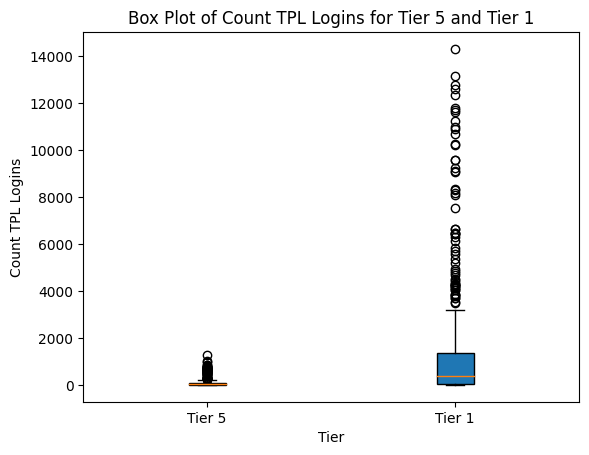

In [13]:
data = [tier5['Count TPL Logins'], tier1['Count TPL Logins']]

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, vert=True, patch_artist=True, labels=['Tier 5', 'Tier 1'])

# Set title and labels
ax.set_title('Box Plot of Count TPL Logins for Tier 5 and Tier 1')
ax.set_ylabel('Count TPL Logins')
ax.set_xlabel('Tier')

In [ ]:
tier5_pivot = tier5.pivot(index='Month with Year', columns='Client Name', values='Count TPL Logins')

# Plot using plotly express
fig = px.line(tier5_pivot, x=tier5_pivot.index, y=tier5_pivot.columns, title="Count TPL Logins by Client over Time (Tier 5)")
fig.update_layout(width = 1000, height = 600)
fig.show()

In [ ]:
clients_to_label = ['Megaport', 'Device42', 'Sandler Partners','GTMHub','Collabria']
other_clients = [client for client in tier5_pivot.columns if client not in clients_to_label]

fig = go.Figure()

for client in clients_to_label:
    fig.add_trace(go.Scatter(x=tier5_pivot.index, y=tier5_pivot[client], mode='lines', name=client))

for client in other_clients:
    fig.add_trace(go.Scatter(x=tier5_pivot.index, y=tier5_pivot[client], mode='lines', name='', showlegend=False))

fig.update_layout(title="Count TPL Logins by Client over Time (Tier 5)", width=1000, height=600)
fig.show()

In [ ]:
tier1_pivot = tier1.pivot(index='Month with Year', columns='Client Name', values='Count TPL Logins')

# Plot using plotly express
fig = px.line(tier1_pivot, x=tier1_pivot.index, y=tier1_pivot.columns, title="Count TPL Logins by Client over Time (Tier 1)")
fig.update_layout(width = 1000, height = 600)
fig.show()

In [ ]:
clients_to_label = ['Nutanix', 'Cisco', 'Dell ', 'AWS']
other_clients = [client for client in tier1_pivot.columns if client not in clients_to_label]

# Create a new figure
fig = go.Figure()

# Add lines for the clients to label
for client in clients_to_label:
    fig.add_trace(go.Scatter(x=tier1_pivot.index, y=tier1_pivot[client], mode='lines', name=client))

# Add lines for other clients without a name so they don't appear in the legend
for client in other_clients:
    fig.add_trace(go.Scatter(x=tier1_pivot.index, y=tier1_pivot[client], mode='lines', name='', showlegend=False))

# Update layout and show
fig.update_layout(title="Count TPL Logins by Client over Time (Tier 1)", width=1000, height=600)
fig.show()

In [18]:
# pull login information for T1&5, Last Task Completion for T1
# https://ziftsolutions.looker.com/explore/marcom/access_log?toggle=fil&qid=iqlzizbNv9ykCmJMvYVrQo

In [90]:
selected_tier5_clients = ['Megaport', 'Device42', 'Sandler Partners']
selected_tier1_clients = ['Nutanix', 'Cisco', 'AWS']

tier5_selected = tier5_pivot[selected_tier5_clients]
tier1_selected = tier1_pivot[selected_tier1_clients]

combined_data = pd.concat([tier5_selected, tier1_selected], axis=1)

rename_mapping = {
    'Nutanix': 'Tier 1 Client A',
    'Cisco': 'Tier 1 Client B',
    'AWS': 'Tier 1 Client C',
    'Megaport': 'Tier 5 Client A',
    'Device42': 'Tier 5 Client B',
    'Sandler Partners': 'Tier 5 Client C'
}

combined_data = combined_data.rename(columns=rename_mapping)
column_order = ['Tier 1 Client A', 'Tier 1 Client B', 'Tier 1 Client C', 'Tier 5 Client A', 'Tier 5 Client B', 'Tier 5 Client C']
combined_data = combined_data[column_order]

fig = px.line(combined_data, x=combined_data.index, y=combined_data.columns, title="Total Logins Per Month Over Time (Top 3 Clients in Tier 1 and Tier 5)")
fig.update_yaxes(title_text="Logins")
fig.update_layout(width=800, height=500)
fig.show()

## Tier 5 User Onboarding

### Data Cleaning and EDA

In [19]:
t5_last_date = pd.read_csv(SOURCE_DIR/'t5_last_date.csv')
t5_user_login = pd.read_csv(SOURCE_DIR/'t5_user_login.csv')
t5_onboarded_users = pd.read_excel(SOURCE_DIR/'t5_onboarded.xlsx')

In [20]:
t5_last_date['Last Date'] = pd.to_datetime(t5_last_date['Last Date'])
t5_last_date.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
t5_onboarded_users.drop('Unnamed: 0', axis=1, inplace=True)
t5_onboarded_users = t5_onboarded_users[~t5_onboarded_users['Email'].isna()]

In [22]:
t5_onboarded_users[['Count','Count User Tasks Completed']].astype(int)

,Count,Count User Tasks Completed
0,19,19
1,29,19
2,19,18
3,19,18
4,24,18
...,...,...
16870,18,0
16871,21,0
16872,21,0
16873,21,0


In [23]:
def get_status(row):
    if row['Count User Tasks Completed'] / row['Count'] > 0.6:
        return 1
    else:
        return 0

t5_onboarded_users['Onboarded Status'] = t5_onboarded_users.apply(get_status, axis=1)

In [24]:
t5_onboarded_users['Onboarded Status'].value_counts()

Onboarded Status
0    16805
1       62
Name: count, dtype: int64

In [25]:
t5_onboarded = t5_user_login[t5_user_login['Partner User Email'].isin(t5_onboarded_users['Email'])] # Filter login data, get the log in info ONLY for onboarded users
t5_onboarded.columns = ['Clinet Name','Email','Month','Logins','TPL Logins']
t5_onboarded['Month'] = pd.to_datetime(t5_onboarded['Month'])

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/842525330.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
t5_merged = t5_onboarded.merge(t5_last_date[['Email', 'Last Date']], 
                                       on='Email', 
                                       how='left') # Merge user login data and onboarded data

In [29]:
t5_merged['Last Date'].isna().value_counts() # Note that there are null values for last date... we would have to throw them out but might lose some insights

Last Date
True     4553
False    3334
Name: count, dtype: int64

In [30]:
t5_merged = t5_merged[~t5_merged['Last Date'].isna()]

In [31]:
t5_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3334 entries, 0 to 7885
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Clinet Name  3334 non-null   object        
 1   Email        3334 non-null   object        
 2   Month        3334 non-null   datetime64[ns]
 3   Logins       3334 non-null   object        
 4   TPL Logins   3334 non-null   object        
 5   Last Date    3334 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 182.3+ KB


In [ ]:
t5_merged['Months After Onboarding'] = (t5_merged['Month'].dt.month - t5_merged['Last Date'].dt.month).astype(int)
t5_merged

In [ ]:
t5_merged['TPL Logins'] = t5_merged['TPL Logins'].replace('-', 0) # Clean data and convert column type to int
t5_merged['Logins'] = t5_merged['Logins'].replace('-', 0)
t5_merged['TPL Logins'] = t5_merged['TPL Logins'].astype(int)
t5_merged['Logins'] = t5_merged['Logins'].astype(int)

In [34]:
t5_average_monthly_login = t5_merged[['TPL Logins','Months After Onboarding']].groupby('Months After Onboarding').mean()
t5_average_monthly_login = t5_average_monthly_login.rename(columns={"TPL Logins": "Average Monthly Logins"})
# t5_average_monthly_login = t5_average_monthly_login[t5_average_monthly_login.index>=0]
t5_average_monthly_login

,Average Monthly Logins
Months After Onboarding,
-11,5.000000
-10,5.148936
-9,3.638298
-8,3.339286
-7,4.039216
-6,4.152542
-5,5.695122
-4,4.854369
-3,4.268519


### Onboarded User Monthly Logins

In [35]:
fig = px.line(t5_average_monthly_login, 
              x=t5_average_monthly_login.index, 
              y='Average Monthly Logins', 
              labels={'index': 'Months After Onboarding', 'Average Monthly Logins': 'Average Monthly Logins'},
              title='Average Monthly Logins vs. Months After Onboarding')
fig.update_layout(width = 800, height = 500)

fig.show()

In [36]:
avg_before_0 = t5_average_monthly_login[t5_average_monthly_login.index < 0]['Average Monthly Logins'].mean()

avg_after_0 = t5_average_monthly_login[t5_average_monthly_login.index > 0]['Average Monthly Logins'].mean()

avg_before_0, avg_after_0

(4.36805181688894, 4.791217383168962)

In [37]:
average_monthly_users = t5_merged[['Months After Onboarding','Email']].groupby('Months After Onboarding').count()
average_monthly_users = average_monthly_users.rename(columns = {"Name":"Count Users"})
average_monthly_users = average_monthly_users[average_monthly_users.index>=0]
average_monthly_users

,Email
Months After Onboarding,
0,1124
1,342
2,187
3,124
4,86
5,77
6,56
7,46
8,42


In [38]:
fig = px.line(average_monthly_users, 
              x=average_monthly_users.index, 
              y='Email', 
              labels={'index': 'Months After Onboarding', 'Email': 'Users'},
              title='Number of Users Who Logged In vs. Months After Onboarding')
fig.update_layout(width = 800, height = 500)

fig.show()

In [39]:
average_monthly_users['Percentage Change'] = average_monthly_users['Email'].pct_change() * 100  # multiply by 100 to get the value in percentage

# Graph the percentage change using Plotly
fig = go.Figure(data=[go.Bar(x=average_monthly_users.index, y=average_monthly_users['Percentage Change'])])
fig.update_layout(title='Percentage Change in Number of Logged-In Users Over Time', xaxis_title='Months after Onboarding', yaxis_title='Percentage Change', width = 800, height = 500)
fig.show()


In [40]:
t5_onboarded = t5_user_login[t5_user_login['Partner User Email'].isin(t5_onboarded_users['Email'])] # Filter login data, get the log in info ONLY for onboarded users
t5_onboarded.columns = ['Clinet Name','Email','Month','Logins','TPL Logins']
t5_onboarded['Month'] = pd.to_datetime(t5_onboarded['Month'])

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/842525330.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
filtered_df = t5_merged[t5_merged['Month'] > t5_merged['Last Date']]

consistent_logins = filtered_df.groupby('Email')[['Month']].nunique().reset_index()
consistent_logins.columns = ['Email','Number of Months']
consistent_logins

,Email,Number of Months
0,Olawunmi@platview.com,2
1,a.rooney@kompaneers.de,8
2,aatahanov@pdgtal.com,5
3,abhijit.shendre@tcs.com,1
4,abhishek1.mawal@birlasoft.com,1
...,...,...
539,zhanghaoze@gmail.com,2
540,zhangtao@yunion-hk.com,2
541,zoe.connolly@userful.com,2
542,zuber.khatib@searce.com,2


In [42]:
consistent_logins.groupby('Number of Months')[['Email']].count()

,Email
Number of Months,
1,284
2,126
3,57
4,27
5,19
6,9
7,10
8,6
9,2


In [43]:
consistent_logins

,Email,Number of Months
0,Olawunmi@platview.com,2
1,a.rooney@kompaneers.de,8
2,aatahanov@pdgtal.com,5
3,abhijit.shendre@tcs.com,1
4,abhishek1.mawal@birlasoft.com,1
...,...,...
539,zhanghaoze@gmail.com,2
540,zhangtao@yunion-hk.com,2
541,zoe.connolly@userful.com,2
542,zuber.khatib@searce.com,2


### Unonboarded User Monthly Logins

In [44]:
t5_unonboarded = t5_user_login[~t5_user_login['Partner User Email'].isin(t5_onboarded_users['Email'])]
t5_unonboarded.columns = ['Clinet Name','Email','Month','Logins','TPL Logins']
t5_unonboarded['Month'] = pd.to_datetime(t5_unonboarded['Month'])

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/3689743539.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
t5_unonboarded['TPL Logins']=t5_unonboarded['TPL Logins'].astype(str)
t5_unonboarded['Logins']=t5_unonboarded['Logins'].astype(str)
t5_unonboarded['TPL Logins'] = t5_unonboarded['TPL Logins'].str.replace(',','').replace('-', 0) # Clean data and convert column type to int
t5_unonboarded['Logins'] = t5_unonboarded['Logins'].str.replace(',','').replace('-', 0)
t5_unonboarded['TPL Logins'] = t5_unonboarded['TPL Logins'].astype(int)
t5_unonboarded['Logins'] = t5_unonboarded['Logins'].astype(int)

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/1751597315.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/1751597315.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/1751597315.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [46]:
t5_unonboarded.groupby('Month')[['TPL Logins']].mean()

,TPL Logins
Month,
2022-09-01,3.584112
2022-10-01,3.870192
2022-11-01,3.179487
2022-12-01,3.175439
2023-01-01,3.205761
2023-02-01,3.289157
2023-03-01,3.158621
2023-04-01,2.892361
2023-05-01,2.565749


In [47]:
t5_unonboarded_mean = t5_unonboarded.groupby('Month')[['TPL Logins']].mean().reset_index()['TPL Logins'].mean()

In [48]:
values = [t5_unonboarded_mean,avg_before_0, avg_after_0]
labels = ['Unonboarded','During Onboarding', 'After Onboarding']
formatted_values = ["{:.2f}".format(val) for val in values]

fig = go.Figure(data=[go.Bar(x=labels, y=values, text=formatted_values, textposition='outside')])
fig.update_layout(title='Average Login Frequency (Times Per Month)', yaxis_title='Average Value',width=800,height=500)

fig.show()

## Tier 1 User Onboarding

In [49]:
t1_user_login = pd.read_csv(SOURCE_DIR/'t1_user_login.csv')
t1_onboarded_users = pd.read_csv(SOURCE_DIR/'t1_onboarded.csv')
t1_last_date = pd.read_csv(SOURCE_DIR/'t1_last_date.csv')

In [50]:
t1_user_login.columns = ['Client Name','Partner User Email','Month','Logins','TPL Logins']

In [ ]:
t1_user_login['Month'] = pd.to_datetime(t1_user_login['Month'])
t1_user_login['Partner User Email'].astype(str)
t1_user_login['Client Name'].astype(str)

In [ ]:
t1_last_date.drop(['Unnamed: 0'], axis=1,inplace=True)
t1_last_date['Last Date'] = pd.to_datetime(t1_last_date['Last Date'])
t1_last_date['Email'].astype(str)

In [53]:
t1_onboarded_users.columns = ['Client Name','Partner User Email','Count','Count User Tasks Completed','Onboarded User']

In [54]:
t1_onboarded_users['Onboarded Status'] = t1_onboarded_users.apply(get_status, axis=1)

In [55]:
t1_onboarded = t1_user_login[t1_user_login['Partner User Email'].isin(t1_onboarded_users['Partner User Email'])] # Filter login data, get the log in info ONLY for onboarded users
t1_onboarded.columns = ['Clinet Name','Email','Month','Logins','TPL Logins']
t1_onboarded['Month'] = pd.to_datetime(t1_onboarded['Month'])

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/3962743282.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
t1_merged = t1_onboarded.merge(t1_last_date[['Email', 'Last Date']], 
                                       on='Email', 
                                       how='left') # Merge user login data and onboarded data

In [60]:
t1_merged['Last Date'].isna().value_counts() # Note that there are null values for last date... we would have to throw them out but might lose some insights

Last Date
False    1973
True      796
Name: count, dtype: int64

In [61]:
t1_merged = t1_merged[~t1_merged['Last Date'].isna()]

In [ ]:
t1_merged.info()

In [ ]:
t1_merged['Months After Onboarding'] = (t1_merged['Month'].dt.month - t1_merged['Last Date'].dt.month).astype(int)
t1_merged

In [ ]:
t1_merged['TPL Logins'] = t1_merged['TPL Logins'].replace('-', 0) # Clean data and convert column type to int
t1_merged['Logins'] = t1_merged['Logins'].replace('-', 0)
t1_merged['TPL Logins'] = t1_merged['TPL Logins'].astype(int)
t1_merged['Logins'] = t1_merged['Logins'].astype(int)

In [65]:
t1_average_monthly_login = t1_merged[['TPL Logins','Months After Onboarding']].groupby('Months After Onboarding').mean()
t1_average_monthly_login = t1_average_monthly_login.rename(columns={"TPL Logins": "Average Monthly Logins"})
# t5_average_monthly_login = t5_average_monthly_login[t5_average_monthly_login.index>=0]
t1_average_monthly_login

,Average Monthly Logins
Months After Onboarding,
-11,4.333333
-10,3.315789
-9,4.407407
-8,6.250000
-7,5.925926
-6,7.155172
-5,7.867647
-4,7.895349
-3,8.448598


In [66]:
fig = px.line(t1_average_monthly_login, 
              x=t1_average_monthly_login.index, 
              y='Average Monthly Logins', 
              labels={'index': 'Months After Onboarding', 'Average Monthly Logins': 'Average Monthly Logins'},
              title='Average Monthly Logins vs. Months After Onboarding')
fig.update_layout(width = 800, height = 500)

fig.show()

In [67]:
t1_avg_before_0 = t1_average_monthly_login[t1_average_monthly_login.index < 0]['Average Monthly Logins'].mean()

t1_avg_after_0 = t1_average_monthly_login[t1_average_monthly_login.index > 0]['Average Monthly Logins'].mean()

t1_avg_before_0, t1_avg_after_0

(6.690739210106969, 9.300876427879214)

In [68]:
t1_average_monthly_users = t1_merged[['Months After Onboarding','Email']].groupby('Months After Onboarding').count()
t1_average_monthly_users = t1_average_monthly_users.rename(columns = {"Name":"Count Users"})
t1_average_monthly_users = t1_average_monthly_users[t1_average_monthly_users.index>=0]
t1_average_monthly_users

,Email
Months After Onboarding,
0,330
1,190
2,141
3,112
4,95
5,80
6,71
7,63
8,55


In [69]:
fig = px.line(t1_average_monthly_users, 
              x=t1_average_monthly_users.index, 
              y='Email', 
              labels={'index': 'Months After Onboarding', 'Email': 'Users'},
              title='Number of Users Who Logged In vs. Months After Onboarding')
fig.update_layout(width = 800, height = 500)

fig.show()

In [70]:
t1_average_monthly_users['Percentage Change'] = t1_average_monthly_users['Email'].pct_change() * 100  # multiply by 100 to get the value in percentage

# Graph the percentage change using Plotly
fig = go.Figure(data=[go.Bar(x=t1_average_monthly_users.index, y=t1_average_monthly_users['Percentage Change'])])
fig.update_layout(title='Percentage Change in Number of Logged-In Users Over Time', xaxis_title='Months after Onboarding', yaxis_title='Percentage Change', width = 800, height = 500)
fig.show()


### Unonboarded User Monthly Logins

In [71]:
t1_unonboarded = t1_user_login[~t1_user_login['Partner User Email'].isin(t1_onboarded_users['Partner User Email'])]
t1_unonboarded.columns = ['Clinet Name','Email','Month','Logins','TPL Logins']
t1_unonboarded['Month'] = pd.to_datetime(t1_unonboarded['Month'])

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/432889433.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
t1_unonboarded['TPL Logins']=t1_unonboarded['TPL Logins'].astype(str)
t1_unonboarded['Logins']=t1_unonboarded['Logins'].astype(str)
t1_unonboarded['TPL Logins'] = t1_unonboarded['TPL Logins'].str.replace(',','').replace('-', 0) # Clean data and convert column type to int
t1_unonboarded['Logins'] = t1_unonboarded['Logins'].str.replace(',','').replace('-', 0)
t1_unonboarded['TPL Logins'] = t1_unonboarded['TPL Logins'].astype(int)
t1_unonboarded['Logins'] = t1_unonboarded['Logins'].astype(int)

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/3787029242.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/3787029242.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/3787029242.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/3787029242.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cs/_ws68z551mdg6_6_dmsht4tc0000gq/T/ipykernel_66442/3787029242.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [73]:
t1_unonboarded.groupby('Month')[['TPL Logins']].mean()

,TPL Logins
Month,
2022-09-01,3.549689
2022-10-01,3.170484
2022-11-01,3.230516
2022-12-01,3.075145
2023-01-01,3.115414
2023-02-01,3.190041
2023-03-01,3.219203
2023-04-01,2.926222
2023-05-01,3.046014


In [74]:
t1_unonboarded_mean = t1_unonboarded.groupby('Month')[['TPL Logins']].mean().reset_index()['TPL Logins'].mean()

In [75]:
grouped = t1_unonboarded.groupby('Month')[['TPL Logins']].mean().reset_index()

In [76]:
fig = px.line(grouped, x='Month', y='TPL Logins', title='Average TPL Logins by Month (Unonboarded)')
fig.update_layout(width = 800, height = 500)
fig.show()

In [77]:
values = [t1_unonboarded_mean,t1_avg_before_0, t1_avg_after_0]
labels = ['Unonboarded','During Onboarding', 'After Onboarding']
formatted_values = ["{:.2f}".format(val) for val in values]

fig = go.Figure(data=[go.Bar(x=labels, y=values, text=formatted_values, textposition='outside')])
fig.update_layout(title='Average Login Frequency (Times Per Month)', yaxis_title='Average Value',width=800,height=500)

fig.show()